<a href="https://colab.research.google.com/github/youaepee/Coursera-IBM-Data-Science/blob/main/PythonProject_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install yfinance beautifulsoup4 requests pandas matplotlib

In [1]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)


print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [28]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

# Fetch HTML content
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")


tables = soup.find_all("table")


for table in tables:
    if "gamestop Quarterly Revenue" in str(table):
        gamestop_revenue = pd.read_html(str(table))[0]
        break


if 'gamestop_revenue' not in locals():
    gamestop_revenue = pd.read_html(str(tables[0]))[0]


gamestop_revenue.columns = ["Date", "Revenue"]  # Rename columns

# Convert "Revenue" to string (if not already) and handle missing values
gamestop_revenue["Revenue"] = gamestop_revenue["Revenue"].astype(str)  # Force string type
gamestop_revenue["Revenue"] = gamestop_revenue["Revenue"].str.replace(",", "").str.replace("$", "")

# Remove rows with empty strings or invalid values
gamestop_revenue = gamestop_revenue[gamestop_revenue["Revenue"] != ""]
gamestop_revenue = gamestop_revenue[gamestop_revenue["Revenue"] != "nan"]  # Drop NaN placeholders

# Convert to numeric (will set invalid parsing as NaN)
gamestop_revenue["Revenue"] = pd.to_numeric(gamestop_revenue["Revenue"], errors="coerce")

# Drop NaN values (if any remain)
gamestop_revenue = gamestop_revenue.dropna(subset=["Revenue"])

# Display last 5 rows
print("GameStop Revenue Data (Last 5 Rows):")
print(gamestop_revenue.tail())

GameStop Revenue Data (Last 5 Rows):
    Date  Revenue
12  2013     8887
13  2012     9551
14  2011     9474
15  2010     9078
16  2009     8806


In [17]:

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")


print("First 5 rows of GameStop Stock Data:")
print(gme_data.head())
print("\nLast 5 rows of GameStop Stock Data:")
print(gme_data.tail())

First 5 rows of GameStop Stock Data:
                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  

Last 5 rows of GameStop Stock Data:
 

In [24]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

# Fetch HTML content
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")


tables = soup.find_all("table")


for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        tesla_revenue = pd.read_html(str(table))[0]
        break


if 'tesla_revenue' not in locals():
    tesla_revenue = pd.read_html(str(tables[0]))[0]


tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"])


print("Tesla Revenue Data (Last 5 Rows):")
print(tesla_revenue.tail())

Tesla Revenue Data (Last 5 Rows):
          Date  Revenue
59  2010-06-30     28.0
60  2010-03-31     21.0
61  2009-12-31      NaN
62  2009-09-30     46.0
63  2009-06-30     27.0


<ipython-input-24-b1067bd1de89>:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(table))[0]


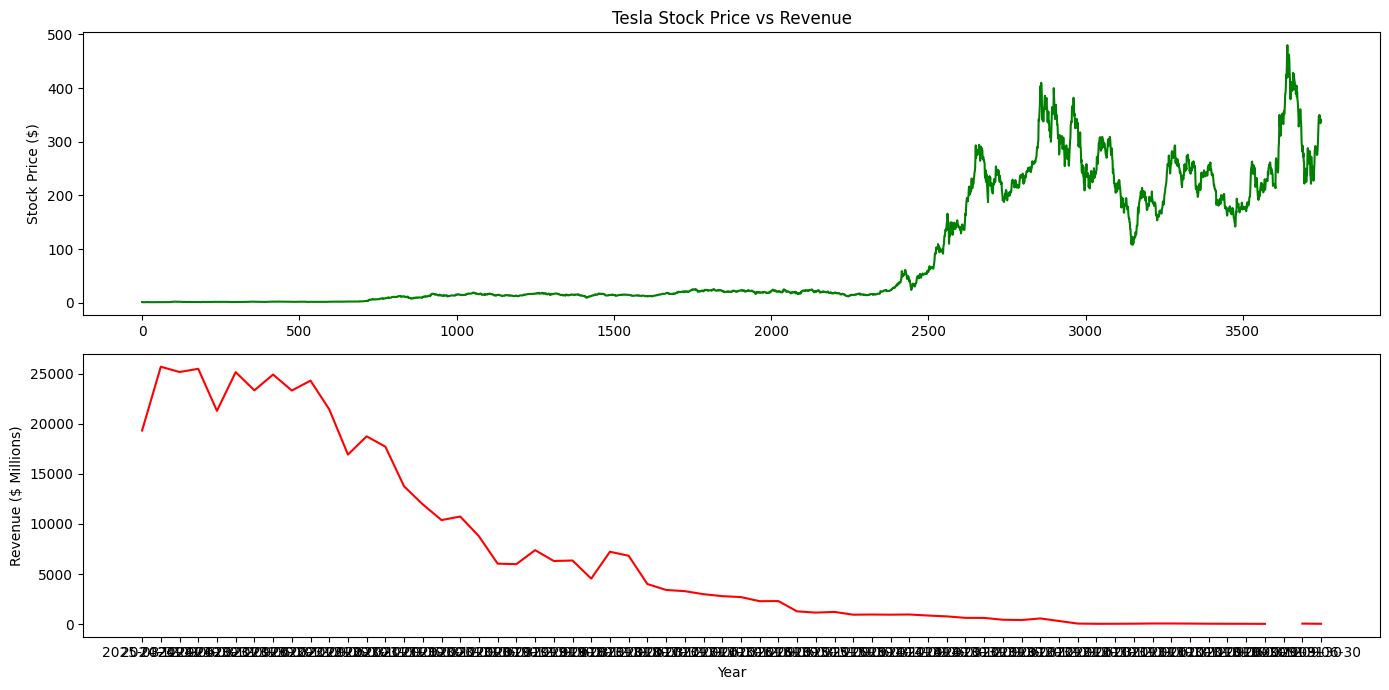

In [29]:
import matplotlib.pyplot as plt

# Plot Tesla stock closing price
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(tesla_data.index, tesla_data["Close"], label="Tesla Stock Price", color="green")
plt.title("Tesla Stock Price vs Revenue")
plt.ylabel("Stock Price ($)")

# Plot Tesla revenue
plt.subplot(2, 1, 2)
plt.plot(tesla_revenue["Date"], tesla_revenue["Revenue"], label="Revenue", color="red")
plt.ylabel("Revenue ($ Millions)")
plt.xlabel("Year")

plt.tight_layout()
plt.show()

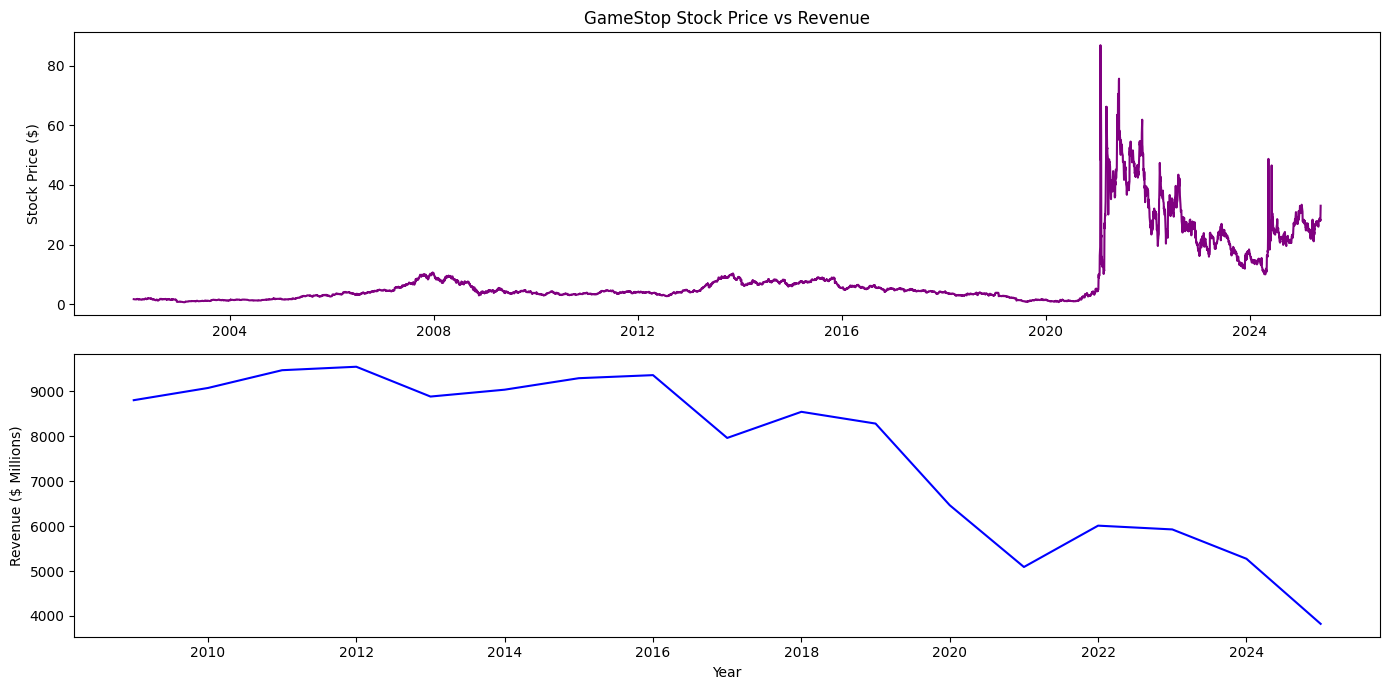

In [31]:
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(gme_data.index, gme_data["Close"], label="GameStop Stock Price", color="purple")
plt.title("GameStop Stock Price vs Revenue")
plt.ylabel("Stock Price ($)")

plt.subplot(2, 1, 2)
plt.plot(gamestop_revenue["Date"], gamestop_revenue["Revenue"], label="Revenue", color="blue")
plt.ylabel("Revenue ($ Millions)")
plt.xlabel("Year")

plt.tight_layout()
plt.show()